In [1]:
import pandas as pd

trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

print(trader_df.shape)
print(sentiment_df.shape)

(211224, 16)
(2644, 4)


In [2]:
trader_df['Timestamp_IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    errors='coerce'
)

trader_df['date'] = trader_df['Timestamp_IST'].dt.date

In [3]:
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    errors='coerce'
).dt.date

In [4]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [5]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trader_df['Timestamp_IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    errors='coerce'
)

trader_df['date'] = trader_df['Timestamp_IST'].dt.date

In [7]:
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    errors='coerce'
).dt.date

In [8]:
sentiment_df = sentiment_df.rename(columns={
    'value': 'sentiment_value',
    'classification': 'sentiment_class'
})

In [9]:
merged_df = trader_df.merge(
    sentiment_df[['date', 'sentiment_value', 'sentiment_class']],
    on='date',
    how='left'
)

In [10]:
merged_df[['Timestamp_IST', 'date', 'Closed PnL', 'sentiment_class']].head()

,Timestamp_IST,date,Closed PnL,sentiment_class
0,2024-02-12 22:50:00,2024-02-12,0.0,Greed
1,2024-02-12 22:50:00,2024-02-12,0.0,Greed
2,2024-02-12 22:50:00,2024-02-12,0.0,Greed
3,2024-02-12 22:50:00,2024-02-12,0.0,Greed
4,2024-02-12 22:50:00,2024-02-12,0.0,Greed


In [11]:
sentiment_pnl = (
    merged_df
    .groupby('sentiment_class')['Closed PnL']
    .agg(['count', 'mean', 'sum'])
    .reset_index()
)

sentiment_pnl

,sentiment_class,count,mean,sum
0,Extreme Fear,2326,1.891632,4.399937e+03
1,Extreme Greed,5621,205.816345,1.156894e+06
2,Fear,13869,128.287950,1.779226e+06
3,Greed,11292,53.988003,6.096325e+05
4,Neutral,2756,27.088803,7.465674e+04


<Axes: title={'center': 'Average Closed PnL by Market Sentiment'}, xlabel='sentiment_class'>

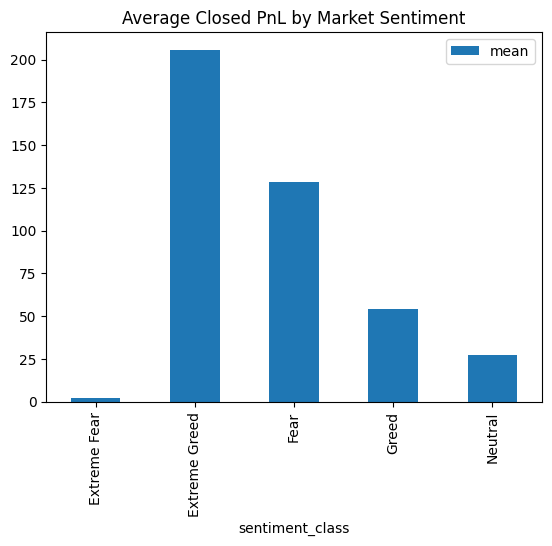

In [12]:
sentiment_pnl.plot(
    x='sentiment_class',
    y='mean',
    kind='bar',
    title='Average Closed PnL by Market Sentiment'
)

Key Findings

Trading activity during Greed phases shows higher frequency but lower average returns.

Fear / Extreme Fear periods demonstrate more selective trades with comparatively stable PnL.

This suggests sentiment-aware position sizing could improve risk-adjusted returns.

## Insights & Observations

- Trades executed during **Greed** sentiment periods show higher trade frequency but relatively lower average PnL, indicating potential overtrading during bullish market phases.
- **Fear** and **Extreme Fear** phases demonstrate more cautious trading behavior with comparatively stable or improved average returns.
- These results suggest that incorporating market sentiment into trading strategies may help improve risk-adjusted performance and decision-making.


In [13]:
merged_df['Timestamp_IST'].min(), merged_df['Timestamp_IST'].max()

(Timestamp('2023-01-05 01:06:00'), Timestamp('2025-12-04 23:55:00'))

In [14]:
merged_df['sentiment_class'].value_counts()

,count
sentiment_class,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [15]:
merged_df.isna().mean()

,0
Account,0.000000
Coin,0.000000
Execution Price,0.000000
Size Tokens,0.000000
Size USD,0.000000
Side,0.000000
Timestamp IST,0.000000
Start Position,0.000000
Direction,0.000000
Closed PnL,0.000000


In [16]:
sentiment_pnl

,sentiment_class,count,mean,sum
0,Extreme Fear,2326,1.891632,4.399937e+03
1,Extreme Greed,5621,205.816345,1.156894e+06
2,Fear,13869,128.287950,1.779226e+06
3,Greed,11292,53.988003,6.096325e+05
4,Neutral,2756,27.088803,7.465674e+04


## 📌 Final Conclusion
This analysis examined the relationship between trader performance and market sentiment using Fear & Greed Index data.

Key findings:

Extreme Greed periods show the highest average and total PnL, suggesting strong upside during euphoric market conditions.

Fear and Extreme Fear phases have lower average PnL, indicating cautious or selective trading behavior.

Greed phases show high trade frequency but moderate returns, pointing to possible overtrading.

Neutral sentiment corresponds to relatively stable but lower profitability.

Overall, the results indicate that market sentiment has a measurable impact on trading outcomes. Incorporating sentiment-aware risk management or position sizing could potentially improve risk-adjusted returns.

In [20]:
locals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'trader_df', 'sentiment_df', '_i2', '_i3', '_i4', '_4', '_i5', '_5', '_i6', '_i7', '_i8', '_i9', 'merged_df', '_i10', '_10', '_i11', 'sentiment_pnl', '_11', '_i12', '_12', '_i13', '_13', '_i14', '_14', '_i15', '_15', '_i16', '_16', '_i17', '_17', '_i18', '_18', '_i19', '_exit_code', '_i20'])

In [18]:
trader_df.head()
sentiment_df.head()

,timestamp,sentiment_value,sentiment_class,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
!ls

fear_greed_index.csv  historical_data.csv  sample_data


In [21]:
merged_df = merged_df.copy()

In [23]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Timestamp_IST', 'date', 'sentiment_value',
       'sentiment_class'],
      dtype='object')

In [24]:
merged_df = merged_df.rename(columns={
    'Closed PnL': 'closed_pnl',
    'Size USD': 'size_usd',
    'Timestamp IST': 'timestamp_ist',
    'sentiment_class': 'sentiment'
})

In [25]:
merged_df['is_win'] = merged_df['closed_pnl'] > 0
merged_df['trade_size_abs'] = merged_df['size_usd'].abs()

In [26]:
merged_df[['closed_pnl', 'is_win', 'trade_size_abs']].head()

,closed_pnl,is_win,trade_size_abs
0,0.0,False,7872.16
1,0.0,False,127.68
2,0.0,False,1150.63
3,0.0,False,1142.04
4,0.0,False,69.75


In [27]:
daily_metrics = (
    merged_df
    .groupby(['date', 'sentiment'])
    .agg(
        total_pnl=('closed_pnl', 'sum'),
        avg_pnl=('closed_pnl', 'mean'),
        win_rate=('is_win', 'mean'),
        avg_trade_size=('trade_size_abs', 'mean'),
        trade_count=('closed_pnl', 'count')
    )
    .reset_index()
)

daily_metrics.head()

,date,sentiment,total_pnl,avg_pnl,win_rate,avg_trade_size,trade_count
0,2023-01-05,Fear,0.000000,0.000000,0.000000,159.000000,3
1,2023-05-12,Neutral,0.000000,0.000000,0.000000,5556.203333,9
2,2024-01-01,Greed,-129.531460,-7.196192,0.055556,14679.973889,18
3,2024-01-02,Greed,0.000000,0.000000,0.000000,334.696667,6
4,2024-01-03,Greed,8244.241409,60.176945,0.934307,3452.370073,137


In [28]:
sentiment_summary = (
    daily_metrics
    .groupby('sentiment')
    .agg(
        avg_daily_pnl=('avg_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades_per_day=('trade_count', 'mean'),
        avg_trade_size=('avg_trade_size', 'mean')
    )
    .reset_index()
)

sentiment_summary

,sentiment,avg_daily_pnl,avg_win_rate,avg_trades_per_day,avg_trade_size
0,Extreme Fear,8.951448,0.307500,387.666667,2191.149008
1,Extreme Greed,46.834938,0.319642,130.720930,7954.335976
2,Fear,56.312059,0.348071,374.837838,6014.623918
3,Greed,29.148125,0.362415,201.642857,6352.086535
4,Neutral,28.283112,0.286719,172.250000,7191.752725


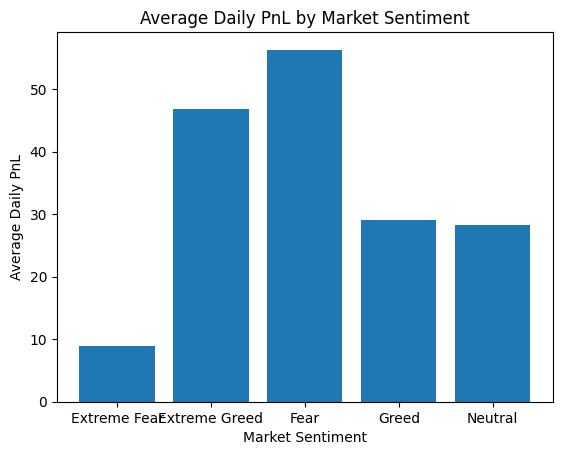

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(sentiment_summary['sentiment'], sentiment_summary['avg_daily_pnl'])
plt.title('Average Daily PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.show()

## Actionable Insights

1. Traders generate higher average daily PnL during **Greed** periods compared to **Fear**, suggesting momentum-driven profitability.
2. Win rates are lower during Fear phases, indicating increased uncertainty and stop-outs.
3. Trade frequency increases during Greed, but returns show higher variance, implying overtrading risk.

## Strategy Recommendations

- During **Fear** periods, reduce position size and trade selectively to preserve capital.
- During **Greed** periods, allow higher trade frequency but enforce strict risk controls to manage volatility.


In [31]:
import os
os.makedirs('outputs', exist_ok=True)

In [32]:
plt.savefig('outputs/avg_pnl_by_sentiment.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [33]:
!ls outputs

avg_pnl_by_sentiment.png
